<a href="https://colab.research.google.com/github/aldirahmanhh/FishMate/blob/ml-branch/disease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import files
uploaded = files.upload()  # This opens a file picker; upload your zipped folder here

import zipfile
import os

# Specify the zip file name (adjust if needed)
with zipfile.ZipFile('/content/Fish Disease.v1i.folder.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/fish_disease_experiment')  # Extract to a folder in Colab


Saving Fish Disease.v1i.folder.zip to Fish Disease.v1i.folder.zip


In [74]:
import os
import random
import numpy as np
from io import BytesIO
# Plotting and dealing with images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Interactive widgets
from ipywidgets import widgets

In [72]:
from re import UNICODE
TRAIN_DIR = '/content/drive/MyDrive/fish_disease/train'
VALID_DIR = '/content/drive/MyDrive/fish_disease/valid'
TEST_DIR = '/content/drive/MyDrive/fish_disease/test'
UNSEEN_DIR = '/content/drive/MyDrive/fish_disease/unseen_data'

# You should see a `fish_disease_experiment` folder here
print(f"files in current directory: {os.listdir()}")

# Check the subdirectories
print(f"\nsubdirectories within '{TRAIN_DIR}' dir: {os.listdir(TRAIN_DIR)}")
print(f"\nsubdirectories within '{VALID_DIR}' dir: {os.listdir(VALID_DIR)}")

files in current directory: ['.config', 'drive', 'sample_data']

subdirectories within '/content/drive/MyDrive/fish_disease/train' dir: ['Viral diseases White tail disease', 'Parasitic diseases', 'Bacterial diseases - Aeromoniasis', 'Bacterial gill disease', 'Fungal diseases Saprolegniasis', 'Bacterial Red disease', 'Healthy Fish']

subdirectories within '/content/drive/MyDrive/fish_disease/valid' dir: ['Bacterial diseases - Aeromoniasis', 'Healthy Fish', 'Bacterial gill disease', 'Bacterial Red disease', 'Viral diseases White tail disease', 'Parasitic diseases', 'Fungal diseases Saprolegniasis']


In [3]:
train_saprolegnia_dir = os.path.join(TRAIN_DIR, 'Fungal diseases Saprolegniasis')
train_aeromoniasis_dir = os.path.join(TRAIN_DIR, 'Bacterial diseases - Aeromoniasis')
train_parasitic_dir = os.path.join(TRAIN_DIR,'Parasitic diseases')

# Check the filenames
train_saprolegnia_names = os.listdir(train_saprolegnia_dir)
print(f"5 files in saprolegnia subdir: {train_saprolegnia_names[:5]}")
train_aeromoniasis_names = os.listdir(train_aeromoniasis_dir)
print(f"5 files in camallanus subdir:{train_aeromoniasis_names[:5]}")

5 files in saprolegnia subdir: ['Fungal-diseases-Saprolegniasis-29-_jpg.rf.a4e917d5344ecb5224e9fc2fcd81c120.jpg', 'Fungal-diseases-Saprolegniasis-28-_jpg.rf.d9e3312613bad130872287be080b2fb1.jpg', 'Fungal-diseases-Saprolegniasis-18-_jpg.rf.11623cc24c461ea350a48cdc8f65350b.jpg', 'Fungal-diseases-Saprolegniasis-8-_jpeg.rf.d5c879ae00c42b0e93ab80405a27b482.jpg', 'Fungal-diseases-Saprolegniasis-11-_jpg.rf.bf8d8c0e2a5c1d935eb75cee07915f3c.jpg']
5 files in camallanus subdir:['Bacterial-diseases-Aeromoniasis-1-_jpeg.rf.d3b4fac83bbd35935a63c592ba5f9c09.jpg', 'Bacterial-diseases-Aeromoniasis-24-_jpg.rf.51fcfc054f8748b36aac028ff8522a37.jpg', 'Bacterial-diseases-Aeromoniasis-26-_jpg.rf.0ac86b95cbdbc22be1b5f902f0f01757.jpg', 'Bacterial-diseases-Aeromoniasis-19-_jpg.rf.a91115bc7e8e63cf2817a079d8cd8fc4.jpg', 'Bacterial-diseases-Aeromoniasis-8-_jpeg.rf.0688f1e70e0985ef9ba906fefc4e437a.jpg']


In [4]:
print(f"total training saprolegnia images: {len(os.listdir(train_saprolegnia_dir))}")
print(f"total training aeromoniasis images: {len(os.listdir(train_aeromoniasis_dir))}")

total training saprolegnia images: 289
total training aeromoniasis images: 289


Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal diseases Saprolegniasis (54).jpg: (640, 640, 3)
Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal diseases Saprolegniasis (51).jpg: (640, 640, 3)
Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal-diseases-Saprolegniasis-1-_png.rf.7e78b9b0b8b34c60380da68064de1a4f.jpg: (640, 640, 3)
Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal diseases Saprolegniasis (14).jpg: (640, 640, 3)
Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal diseases Saprolegniasis (20).jpg: (640, 640, 3)
Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal diseases Saprolegniasis (215).jpg: (640, 640, 3)
Shape of image /content/drive/MyDrive/fish_disease/train/Fungal diseases Saprolegniasis/Fungal diseases

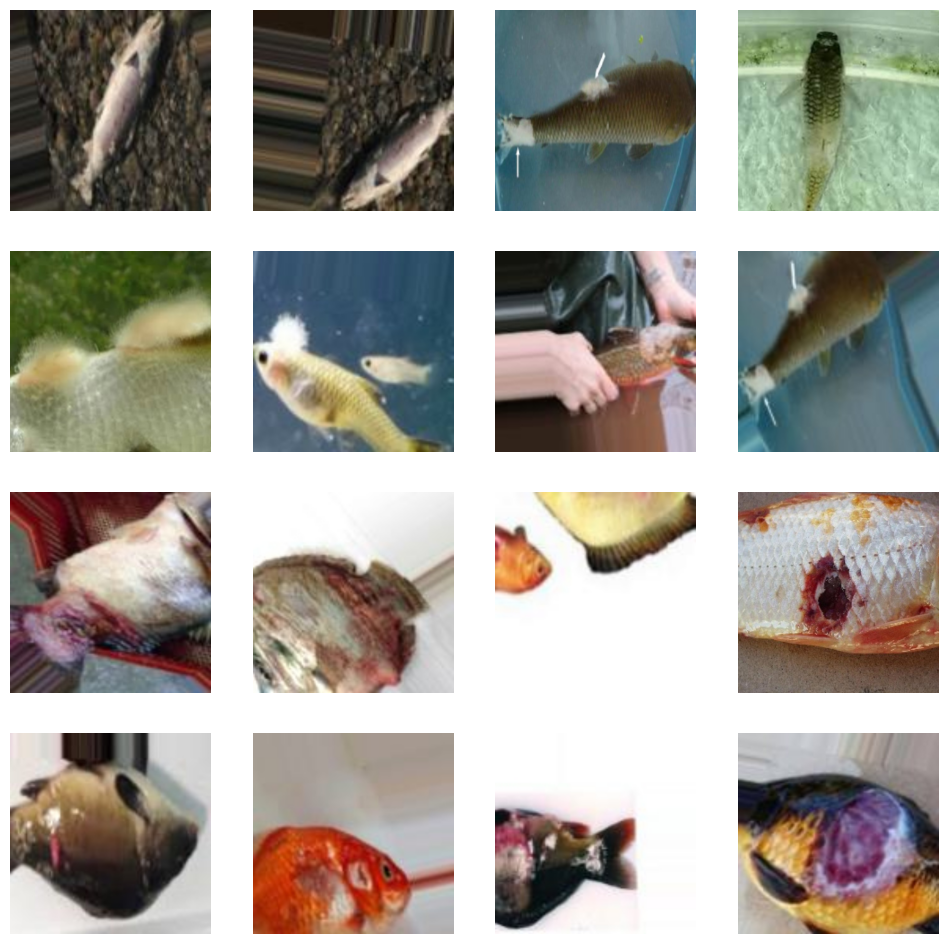

In [6]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(train_saprolegnia_dir, fname)
                for fname in random.sample(train_saprolegnia_names, k=8)]
next_human_pix = [os.path.join(train_aeromoniasis_dir, fname)
                for fname in random.sample(train_aeromoniasis_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    print(f"Shape of image {img_path}: {img.shape}") # Print the shape of the image

plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.1)
])

In [55]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.Input(shape=(224, 224, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_6 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 550,055 (2.10 MB)

 Trainable params: 550,055 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [69]:
# Instantiate the dataset
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
    )
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    VALID_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
    )
test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
    )
# Check the type
dataset_type = type(train_dataset)
print(f'train_dataset inherits from tf.data.Dataset: {issubclass(dataset_type, tf.data.Dataset)}')

Found 2107 files belonging to 7 classes.
Found 44 files belonging to 7 classes.
Found 45 files belonging to 7 classes.
train_dataset inherits from tf.data.Dataset: True


In [ ]:
# Mapping Augmentation and Prefetch the data
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

validation_dataset = validation_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(tf.data.AUTOTUNE)

In [36]:
for images, labels in train_dataset.take(1):
	example_batch_images = images
	example_batch_labels = labels

print(f"Maximum pixel value of images: {np.max(example_batch_images)}\n")
print(f"Shape of batch of images: {example_batch_images.shape}")
print(f"Shape of batch of labels: {example_batch_labels.shape}")

Maximum pixel value of images: 255.0

Shape of batch of images: (32, 224, 224, 3)
Shape of batch of labels: (32, 7)


In [59]:
model.fit(train_dataset,epochs=30,validation_data=validation_dataset)

Epoch 1/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.1897 - loss: 1.9429 - val_accuracy: 0.4545 - val_loss: 1.8812
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.2263 - loss: 1.9099 - val_accuracy: 0.3409 - val_loss: 1.8887
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - accuracy: 0.2595 - loss: 1.8730 - val_accuracy: 0.5227 - val_loss: 1.5713
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.2976 - loss: 1.7982 - val_accuracy: 0.4773 - val_loss: 1.4097
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - accuracy: 0.3541 - loss: 1.7230 - val_accuracy: 0.3864 - val_loss: 1.6749
Epoch 6/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.3670 - loss: 1.6284 - val_accuracy: 0.4318 - val_loss: 1.5839
Epoch 7/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.3857 - loss: 1.6138 - val_accuracy: 0.5227 - val_loss: 1.3453
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.4113 - loss: 1.5418 - val_accura

In [60]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8042 - loss: 0.5586 


[0.5817640423774719, 0.800000011920929]

In [75]:
# Function to preprocess the uploaded image
def preprocess_image(img_path, target_size=(224, 224)):
    # Load the image
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the input shape of the model
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image to [0, 1]
    img_array = img_array / 255.0
    return img_array

# Function to input image path and make a prediction
def predict_uploaded_image(model, class_names):
    # Ask the user for the image path
    file_path = input("Enter the path to the image for prediction: ")

    if file_path:
        # Preprocess the image
        img_array = preprocess_image(file_path)
        # Make a prediction
        predictions = model.predict(img_array)
        # Get the class with the highest probability
        predicted_class = np.argmax(predictions, axis=1)[0]
        confidence = np.max(predictions)

        # Display results
        print(f"Predicted Class: {class_names[predicted_class]}")
        print(f"Confidence: {confidence * 100:.2f}%")
    else:
        print("No file path provided.")

In [77]:
class_names = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6', 'Category 7']
predict_uploaded_image(model, class_names)

Enter the path to the image for prediction: /content/drive/MyDrive/fish_disease/unseen_data/VHS.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class: Category 4
Confidence: 93.33%
